# Housing Price Prediction - Advanced regression Assignment

The solution is divided into the following sections:
<br>1.Data understanding and exploration
<br>2.Data cleaning
<br>3.Data preparation
<br>4.Model building and evaluation
<br>5.Observation

In [1]:
# importing the requisite libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

import statsmodels.api as sm

import os

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('max_rows', None)

In [3]:
pd.set_option('max_columns', None)

### 1. Data Understanding and Exploration

In [4]:
# Reading the dataset
raw_data = pd.read_csv('train.csv')

In [5]:
raw_data.shape

(1460, 81)

In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
#copying rawdata to working dataset
data=raw_data.copy()

In [8]:
#checking duplicates
sum(data.duplicated(subset = 'Id')) == 0

True

In [9]:
# Drop 'Id' as it is record index.
data.drop(['Id'], axis = 1, inplace = True)

In [10]:
# Drop 'TotalBsmtSF' as it is sum of 'BsmtFinSF1' and 'BsmtFinSF2'.
data.drop(['TotalBsmtSF'], axis = 1, inplace = True)

In [11]:
data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#### Checking Correlation

To perform linear regression, the (numeric) target variable should be linearly related to at least one another numeric variable. Let's see whether that's true in this case.

We'll first subset the list of all (independent) numeric variables.

In [12]:
#All numeric (float and int) columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_columns].head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


Here, although some variables are numeric (int), we'd rather treat them as categorical since they have discrete values.

In [13]:
# dropping the columns we want to treat as categorical variables
numeric_columns_continuous = numeric_columns.drop(['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 
                                    'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
                                   'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 
                                   'MoSold', 'YrSold'])
data[numeric_columns_continuous].head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,65.0,8450,196.0,706,0,150,856,854,0,1710,548,0,61,0,0,0,0,0,208500
1,80.0,9600,0.0,978,0,284,1262,0,0,1262,460,298,0,0,0,0,0,0,181500
2,68.0,11250,162.0,486,0,434,920,866,0,1786,608,0,42,0,0,0,0,0,223500
3,60.0,9550,0.0,216,0,540,961,756,0,1717,642,0,35,272,0,0,0,0,140000
4,84.0,14260,350.0,655,0,490,1145,1053,0,2198,836,192,84,0,0,0,0,0,250000


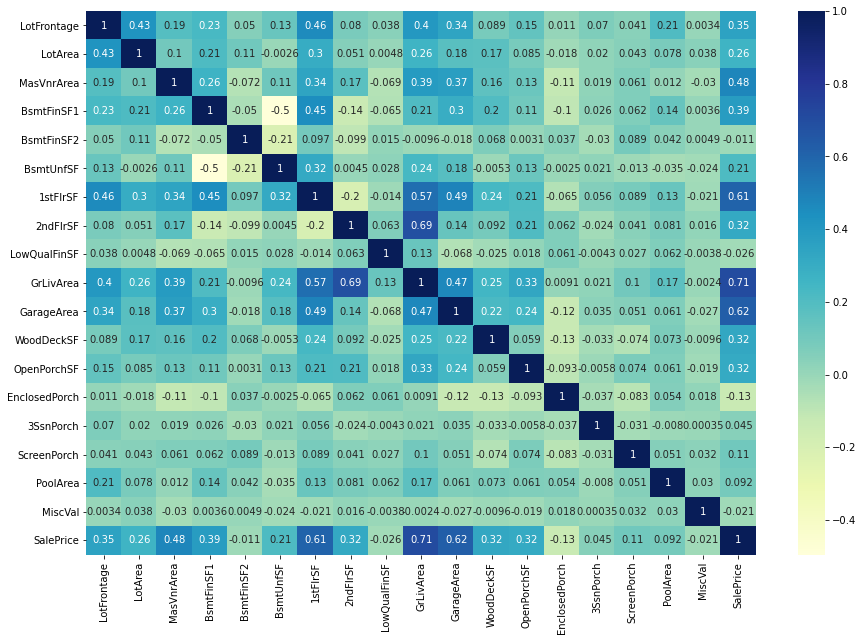

In [14]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (15, 10))
sns.heatmap(data[numeric_columns_continuous].corr(), annot = True, cmap="YlGnBu")
plt.show()

The heatmap shows some useful insights:

Correlation of price with independent variables:
- SalePrice is highly correlated with 1stFlrSF, GrLivArea and GarageArea.


Correlation among independent variables:
- GrLivArea is highly correlated with 1stFlrSF and 2ndFlrSF.

Thus, while building the model, we'll have to pay attention to multicollinearity (especially linear models, such as linear and logistic regression, suffer more from multicollinearity).

<function matplotlib.pyplot.show(close=None, block=None)>

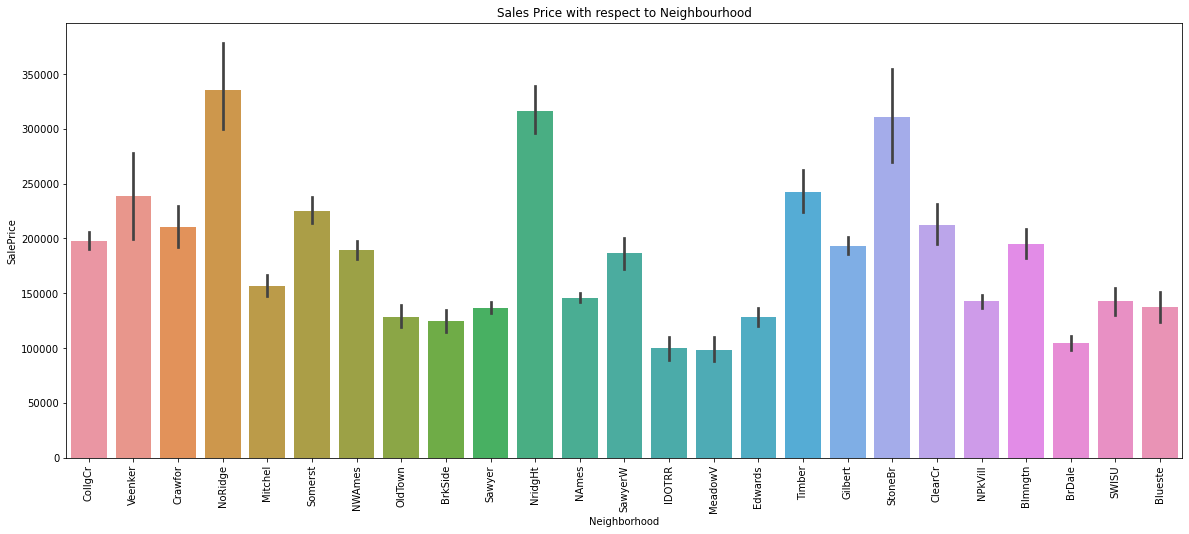

In [15]:
# plot 'Sale Price' with respect to 'Neighborhood'

plt.figure(figsize=(20, 8))
sns.barplot(x="Neighborhood", y="SalePrice", data= data)
plt.title("Sales Price with respect to Neighbourhood")
plt.xticks(rotation=90)
plt.show

NoRidge, NridgHt and StoneBr are costly area.

<function matplotlib.pyplot.show(close=None, block=None)>

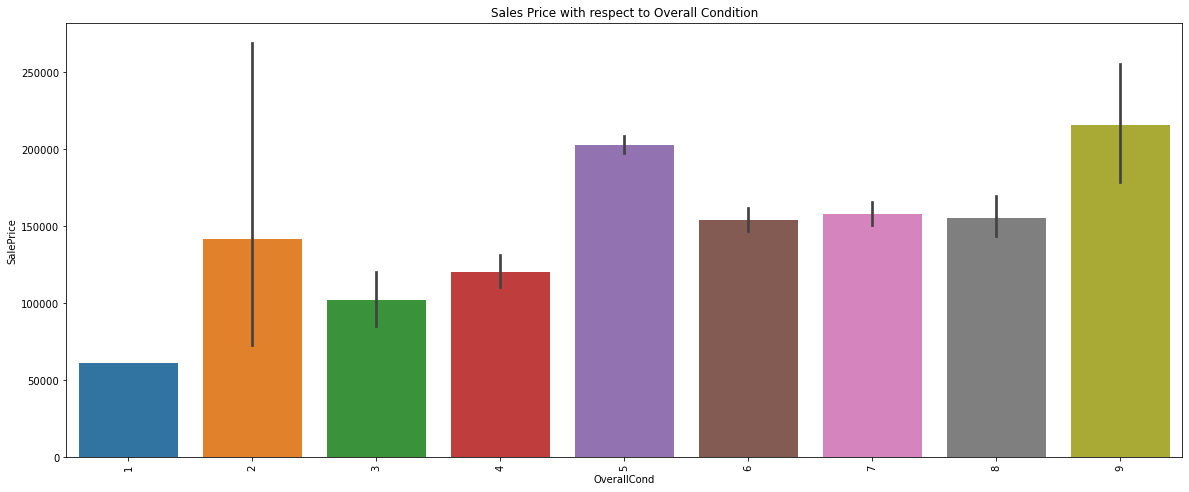

In [16]:
# plot 'overall condition' with respect to 'Saleprice'

plt.figure(figsize=(20, 8))
sns.barplot(x="OverallCond", y="SalePrice", data= data)
plt.title("Sales Price with respect to Overall Condition")
plt.xticks(rotation=90)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

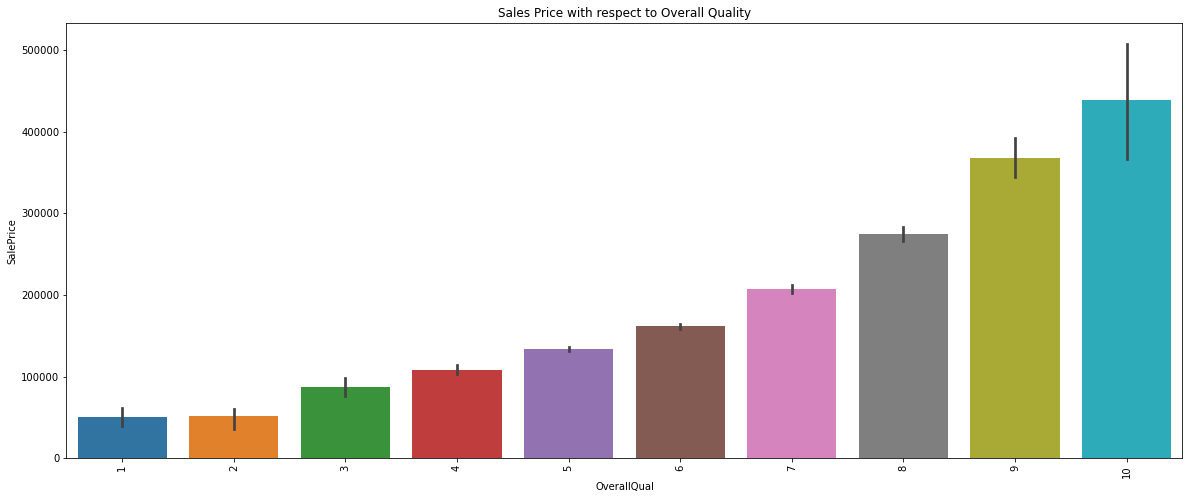

In [17]:
# plot 'overall quality' with respect to 'Saleprice'

plt.figure(figsize=(20, 8))
sns.barplot(x="OverallQual", y="SalePrice", data= data)
plt.title("Sales Price with respect to Overall Quality")
plt.xticks(rotation=90)
plt.show

SalePrice increases with OverallQual.

In [18]:
def UnvrBoxPlots(num):
    i=1
    plt.figure(figsize=(24, 40))
    for var in num:
        plt.subplot(10,4,i)
        sns.boxplot(data = data[[var]])
        i=i+1
    plt.tight_layout()
    plt.show()

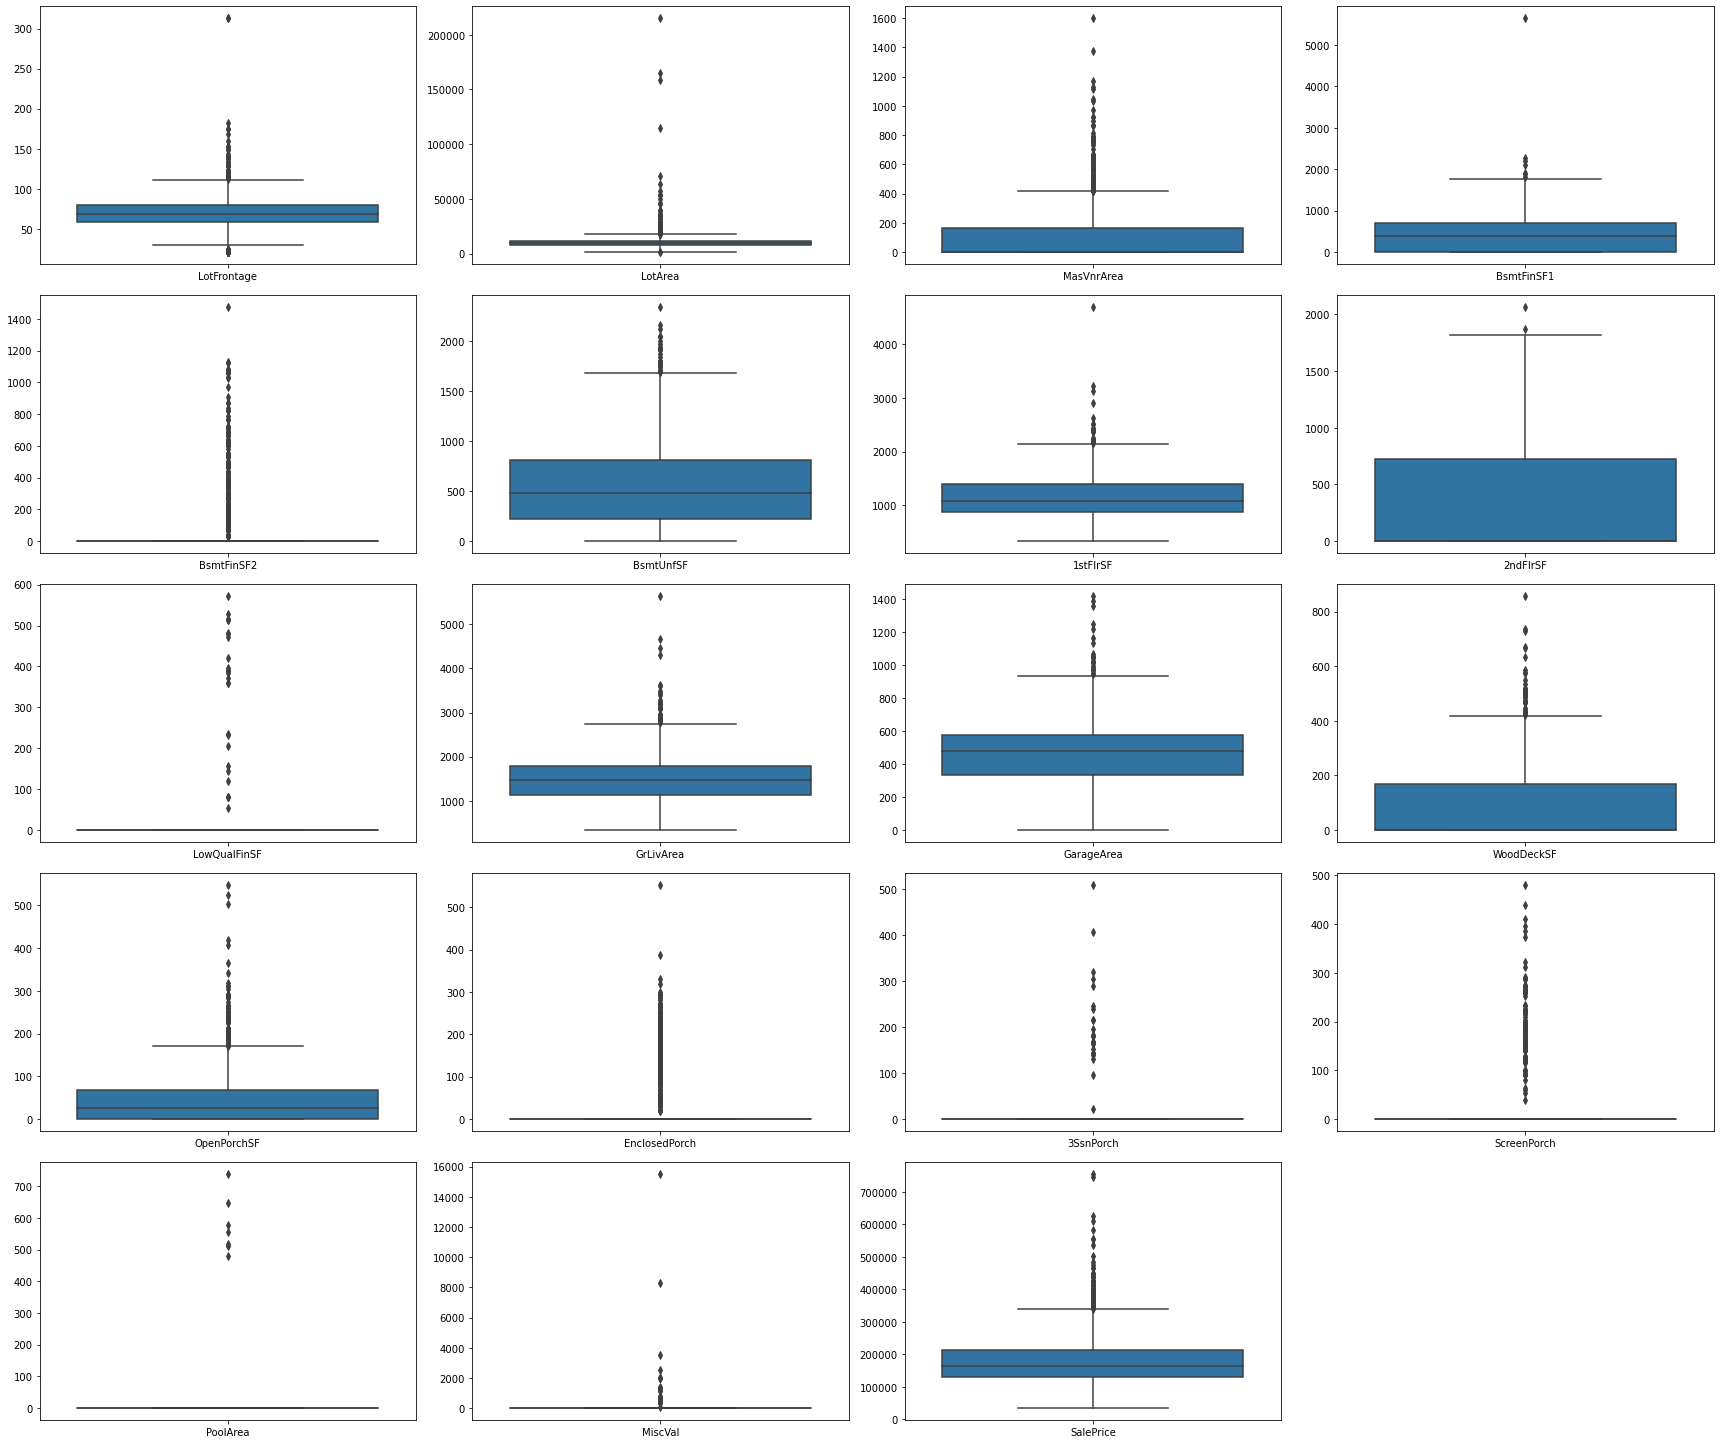

In [19]:
UnvrBoxPlots(numeric_columns_continuous)

It is observed that there are many outliers in continuous numeric variables.
<br> And mean of variables BsmtFinSF2, LowQualFinSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea and MiscVal is zero.
<br> It means these features(above variables) are available in few houses only.

In [20]:
def plotDistribution(num):
    i=1
    plt.figure(figsize=(24, 40))
    for var in num:
        plt.subplot(10,4,i)
        ax = sns.distplot(data[[var]], hist=True, rug=True)
        plt.title(var)
        i=i+1
    plt.tight_layout()
    plt.show()

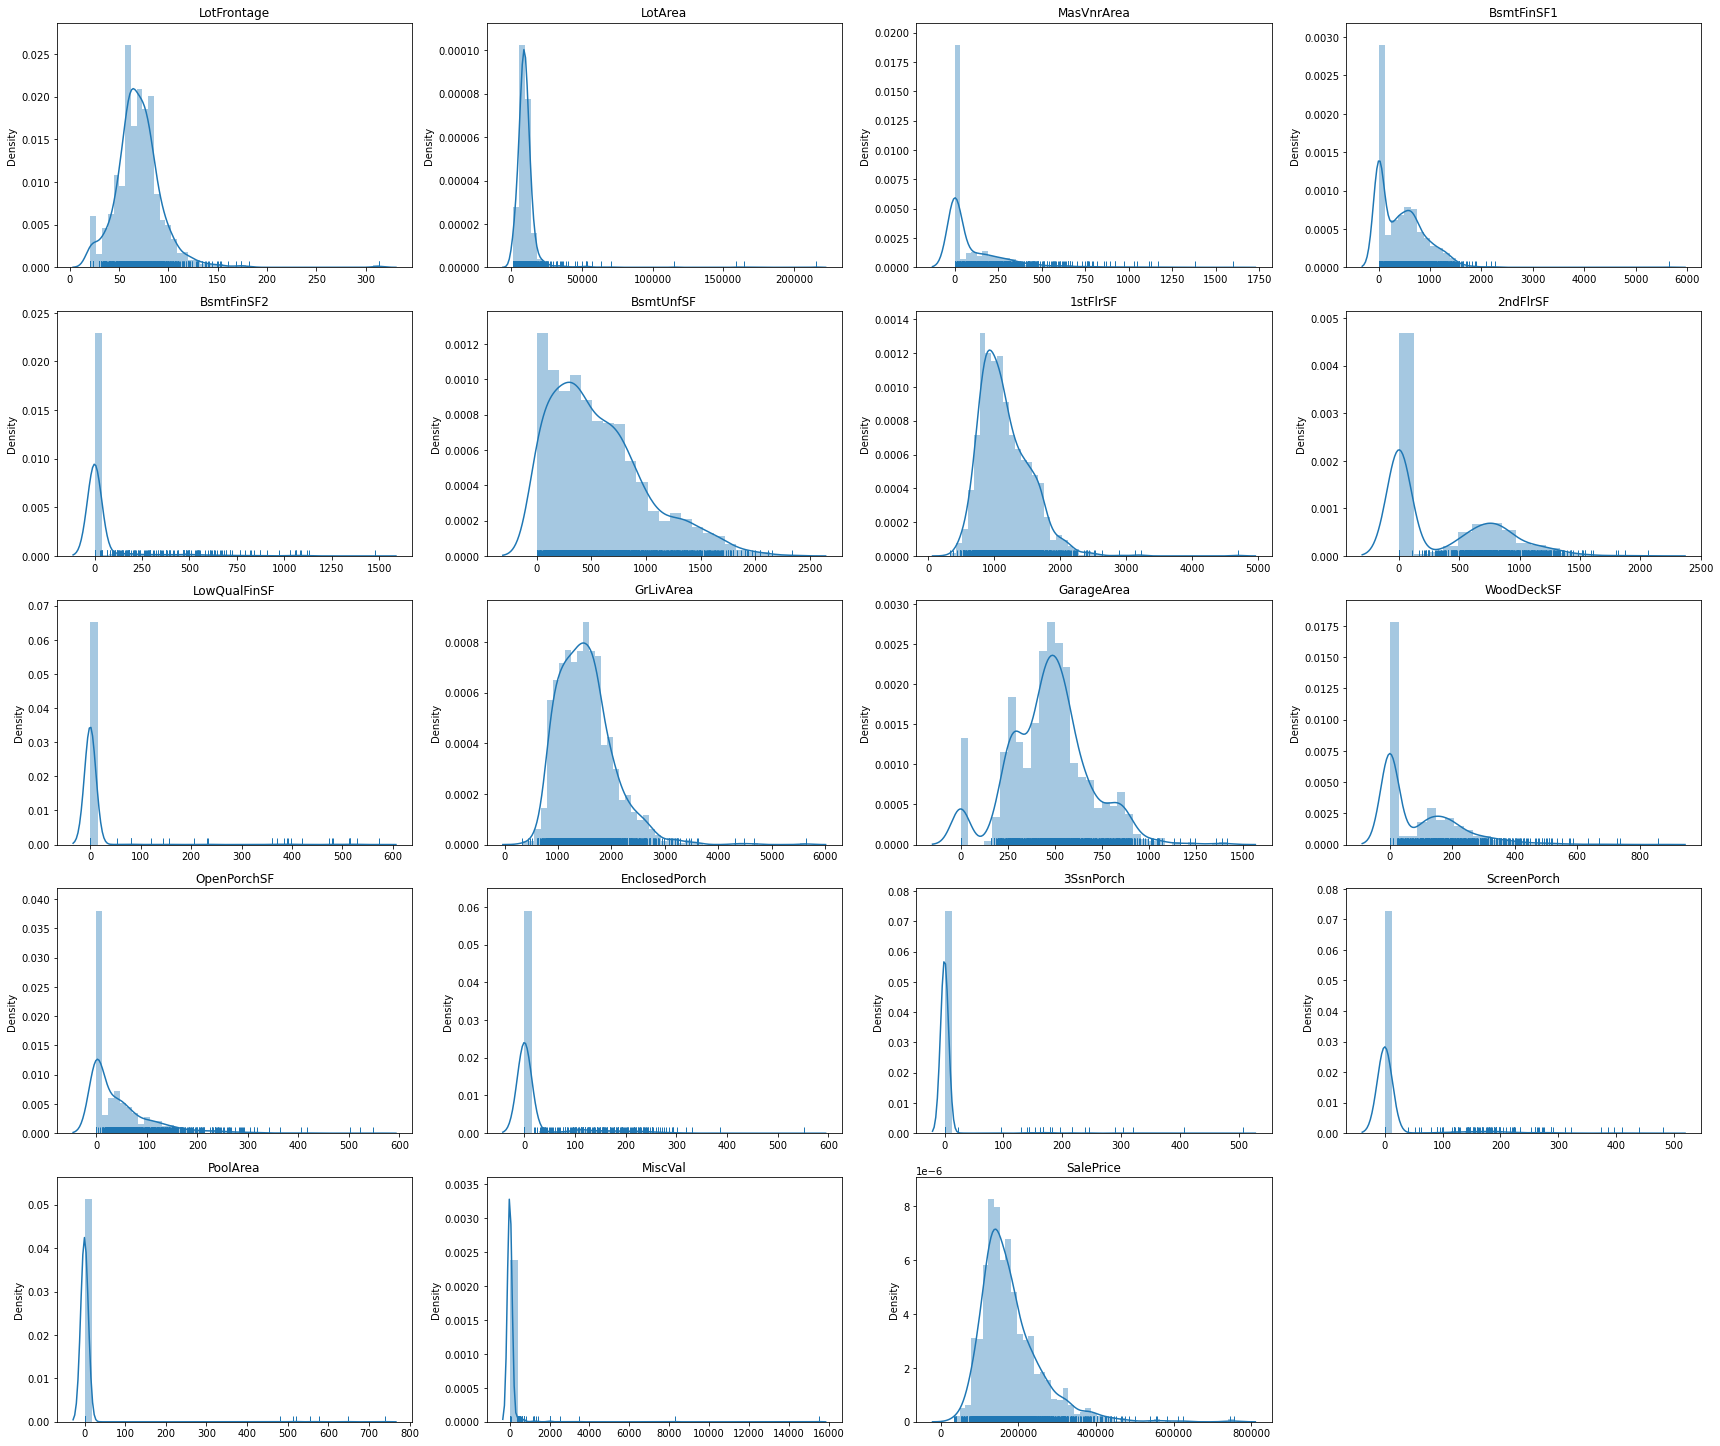

In [21]:
plotDistribution(numeric_columns_continuous)

From above distribution plot, it is observed that data is not evenly distributed.

### 2. Data Cleaning 
#### Missing value imputation

In [22]:
# Checking for percentage nulls
round(100*(data.isnull().sum()/len(data.index)), 2)

MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF          0.00
2ndFlrSF          0.00
LowQualFinS

According to the data dictionary provided, the nulls in many of these columns indicates the absence of facility which may affect the price. Hence, we will first impute the categorical variables with 'None'.

In [23]:
meaningful_null = ["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]
for i in meaningful_null:
    data[i].fillna("none", inplace=True)

In [24]:
# Check nulls once again
null = data.isnull().sum()
null = null[null>0]
null

LotFrontage    259
MasVnrType       8
MasVnrArea       8
Electrical       1
GarageYrBlt     81
dtype: int64

In [25]:
data['MasVnrType'].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [26]:
#dropping nulls from 'MasVnrType'
data.dropna(subset=['MasVnrType'],inplace=True)

In [27]:
# Check nulls once again
null2 = data.isnull().sum()
null2 = null2[null2>0]
null2

LotFrontage    257
Electrical       1
GarageYrBlt     81
dtype: int64

In [28]:
data['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

In [29]:
#dropping nulls from 'Electrical'
data.dropna(subset=['Electrical'],inplace=True)

In [30]:
# Check nulls once again
null3 = data.isnull().sum()
null3 = null3[null3>0]
null3

LotFrontage    257
GarageYrBlt     81
dtype: int64

In [31]:
data.shape

(1451, 79)

In [32]:
# Will check both columns one by one
data['LotFrontage'].describe()

count    1194.000000
mean       70.027638
std        24.299302
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [33]:
# As per the data dictionary "LotFrontage" is Linear feet of street connected to property.  
# Since it is a numeric with a fair distribution, it can be imputed with similar 'Neighborhood' values
data['LotFrontage'] = data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [34]:
# Crosscheck the updated 'LotFrontage' column
data['LotFrontage'].describe()

count    1451.000000
mean       70.181599
std        22.450672
min        21.000000
25%        60.000000
50%        70.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [35]:
# Fill null values of 'GarageYrBlt' by values of 'YearBuilt'
data['GarageYrBlt'] = data['GarageYrBlt'].transform(lambda x: x.fillna(data['YearBuilt']))

In [36]:
# Check nulls once again
null4 = data.isnull().sum()
null4 = null4[null4>0]
null4

Series([], dtype: int64)

In [37]:
# Checking variable formats
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1451 non-null   int64  
 1   MSZoning       1451 non-null   object 
 2   LotFrontage    1451 non-null   float64
 3   LotArea        1451 non-null   int64  
 4   Street         1451 non-null   object 
 5   Alley          1451 non-null   object 
 6   LotShape       1451 non-null   object 
 7   LandContour    1451 non-null   object 
 8   Utilities      1451 non-null   object 
 9   LotConfig      1451 non-null   object 
 10  LandSlope      1451 non-null   object 
 11  Neighborhood   1451 non-null   object 
 12  Condition1     1451 non-null   object 
 13  Condition2     1451 non-null   object 
 14  BldgType       1451 non-null   object 
 15  HouseStyle     1451 non-null   object 
 16  OverallQual    1451 non-null   int64  
 17  OverallCond    1451 non-null   int64  
 18  YearBuil

Converting 'YearBuilt' into 'AgeBuilt'
<br>Converting 'YearRemodAdd'into 'AgeRemodAdd'
<br>Converting 'GarageYrBlt' into 'GarageAgeBlt'
<br>Converting 'YrSold' into 'AgeSold'

In [38]:
data['YearBuilt'].max()

2010

In [39]:
data['YearRemodAdd'].max()

2010

In [40]:
data['GarageYrBlt'] = data['GarageYrBlt'].astype('int64')

In [41]:
data['GarageYrBlt'].max()

2010

In [42]:
data['YrSold'].max()

2010

In [43]:
#Since 2010 is last year in all the three categories, we will consider 2010 for calculating age.

data['AgeBuilt'] = 2010 - data['YearBuilt']
data['AgeRemodAdd'] = 2010 - data['YearRemodAdd']
data['GarageAgeBlt'] = 2010 - data['GarageYrBlt']
data['AgeSold'] = 2010 - data['YrSold']

In [44]:
# dropping 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt'and 'YrSold' variable
data=data.drop(['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold'],axis=1)

##### Converting 'OverallQual', 'OverallCond', 'BsmtFullBath','BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'MoSold' to categorical

In [45]:
data['MSSubClass']= data['MSSubClass'].astype('object')
data['OverallQual']  = data['OverallQual'].astype('object')
data['OverallCond']  = data['OverallCond'].astype('object')
data['BsmtFullBath'] = data['BsmtFullBath'].astype('object')
data['BsmtHalfBath'] = data['BsmtHalfBath'].astype('object')
data['FullBath']     = data['FullBath'].astype('object')
data['HalfBath']     = data['HalfBath'].astype('object')
data['BedroomAbvGr'] = data['BedroomAbvGr'].astype('object')
data['KitchenAbvGr'] = data['KitchenAbvGr'].astype('object')
data['TotRmsAbvGrd'] = data['TotRmsAbvGrd'].astype('object')
data['Fireplaces']   = data['Fireplaces'].astype('object')
data['GarageCars']   = data['GarageCars'].astype('object')
data['MoSold']       = data['MoSold'].astype('object')

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1451 non-null   object 
 1   MSZoning       1451 non-null   object 
 2   LotFrontage    1451 non-null   float64
 3   LotArea        1451 non-null   int64  
 4   Street         1451 non-null   object 
 5   Alley          1451 non-null   object 
 6   LotShape       1451 non-null   object 
 7   LandContour    1451 non-null   object 
 8   Utilities      1451 non-null   object 
 9   LotConfig      1451 non-null   object 
 10  LandSlope      1451 non-null   object 
 11  Neighborhood   1451 non-null   object 
 12  Condition1     1451 non-null   object 
 13  Condition2     1451 non-null   object 
 14  BldgType       1451 non-null   object 
 15  HouseStyle     1451 non-null   object 
 16  OverallQual    1451 non-null   object 
 17  OverallCond    1451 non-null   object 
 18  RoofStyl

#### Check for outlier treatment

In [47]:
#Checking for outlier in the numerical columns
data[numeric_columns_continuous].describe(percentiles=[.25,.5,.75,.90,.95,.99])

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1451.000000,1451.000000,1451.00000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000
mean,70.181599,10507.808408,103.75672,442.274983,46.838043,567.197105,1161.551344,346.742247,5.880772,1514.174363,472.525155,94.412819,46.422467,21.952447,3.430737,15.154376,2.776017,43.758787,180624.101999
std,22.450672,9992.987081,181.10815,455.369276,161.777324,442.209192,385.002532,436.453277,48.771560,525.799521,214.171752,125.436852,66.060150,61.108223,29.406940,55.917522,40.301212,497.648467,79312.128273
min,21.000000,1300.000000,0.00000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,60.000000,7537.500000,0.00000,0.000000,0.000000,222.000000,882.000000,0.000000,0.000000,1128.000000,327.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129900.000000
50%,70.000000,9477.000000,0.00000,381.000000,0.000000,479.000000,1086.000000,0.000000,0.000000,1464.000000,478.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,162500.000000
75%,80.000000,11600.000000,166.00000,707.000000,0.000000,808.000000,1391.000000,728.000000,0.000000,1776.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000
90%,92.000000,14375.000000,335.00000,1064.000000,119.000000,1232.000000,1680.000000,954.000000,0.000000,2158.000000,757.000000,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,278000.000000
95%,104.000000,17308.500000,456.00000,1272.000000,398.000000,1468.000000,1827.000000,1141.500000,0.000000,2464.000000,849.000000,335.000000,173.000000,180.000000,0.000000,160.000000,0.000000,0.000000,325812.000000
99%,137.500000,37802.000000,792.00000,1572.500000,832.000000,1797.500000,2212.000000,1420.000000,360.000000,3126.000000,1004.500000,506.000000,286.000000,261.500000,168.000000,268.500000,0.000000,700.000000,439390.000000


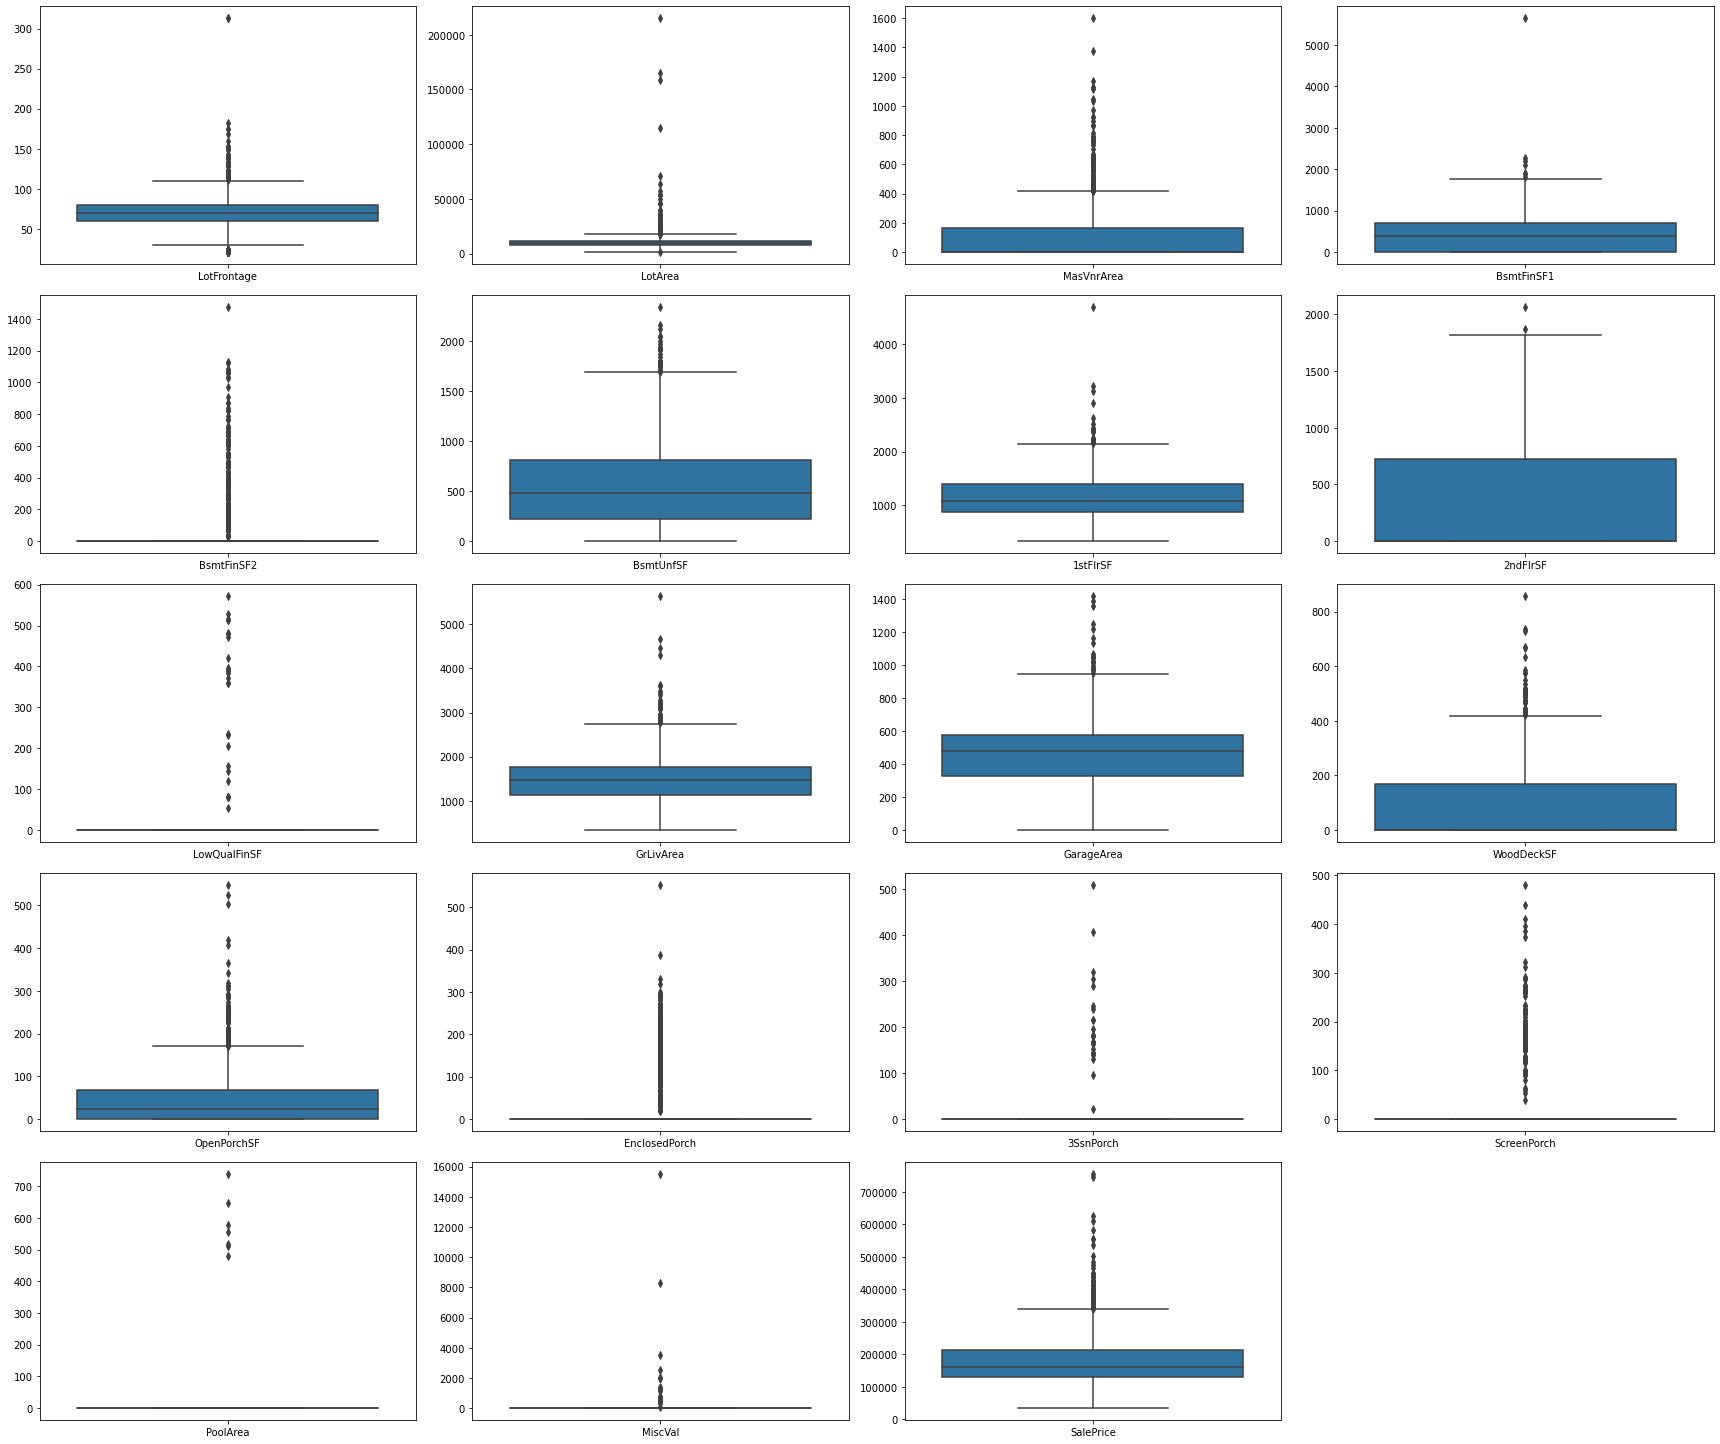

In [48]:
UnvrBoxPlots(numeric_columns_continuous)

In [49]:
(data['LotFrontage']>200).sum()

2

In [50]:
#dropping outliers of 'LotFrontage'
data=data[data['LotFrontage']<=200]

<function matplotlib.pyplot.show(close=None, block=None)>

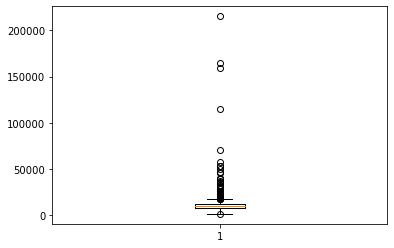

In [51]:
plt.boxplot(data['LotArea'])
plt.show

In [52]:
(data['LotArea']>100000).sum()

4

In [53]:
#dropping outliers of 'LotArea'
data=data[data['LotArea']<=100000]

In [54]:
(data['MasVnrArea']>1200).sum()

2

In [55]:
#dropping outliers of 'MasVnrArea'
data=data[data['MasVnrArea']<=1200]

In [56]:
data['PoolArea'].value_counts()

0      1437
512       1
519       1
555       1
576       1
648       1
738       1
Name: PoolArea, dtype: int64

In [57]:
data['PoolQC'].value_counts()

none    1437
Ex         2
Gd         2
Fa         2
Name: PoolQC, dtype: int64

Only 7 houses have pool.

In [58]:
(data['BsmtFinSF2']>1200).sum()

1

In [59]:
#dropping outliers of 'BsmtFinSF2'
data=data[data['BsmtFinSF2']<=1200]

In [60]:
data['LowQualFinSF'].value_counts()

0      1416
80        3
360       2
392       1
528       1
515       1
514       1
513       1
481       1
479       1
473       1
420       1
397       1
390       1
53        1
384       1
371       1
234       1
232       1
205       1
156       1
144       1
120       1
572       1
Name: LowQualFinSF, dtype: int64

Only 25 houses have 'LowQualFinSF'.

In [61]:
(data['GrLivArea']>4000).sum()

3

In [62]:
#dropping outliers of 'GrLivArea'
data=data[data['GrLivArea']<=4000]

In [63]:
data['3SsnPorch'].value_counts()

0      1415
168       3
216       2
144       2
180       2
407       1
320       1
304       1
290       1
245       1
238       1
182       1
196       1
23        1
162       1
153       1
140       1
130       1
96        1
508       1
Name: 3SsnPorch, dtype: int64

Only 24 houses have '3SsnPorch'.

In [64]:
(data['MiscVal']>4000).sum()

2

In [65]:
#dropping outliers of 'MiscVal'
data=data[data['MiscVal']<=4000]

In [66]:
data.shape

(1437, 79)

### 3. Data Preparation

#### Data Preparation

Let's now prepare the data and build the model.

In [67]:
# columns with numerical variables
data_numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
print(data_numerical_columns)

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'AgeBuilt',
       'AgeRemodAdd', 'GarageAgeBlt', 'AgeSold'],
      dtype='object')


In [68]:
# creating dummy variables for categorical variables

# subset all categorical variables
data_categorical = data.select_dtypes(include=['object'])
data_categorical.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,SaleType,SaleCondition
0,60,RL,Pave,none,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,1,0,2,1,3,1,Gd,8,Typ,0,none,Attchd,RFn,2,TA,TA,Y,none,none,none,2,WD,Normal
1,20,RL,Pave,none,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,TA,TA,Y,none,none,none,5,WD,Normal
2,60,RL,Pave,none,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,TA,TA,Y,none,none,none,9,WD,Normal
3,70,RL,Pave,none,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,TA,TA,Y,none,none,none,2,WD,Abnorml
4,60,RL,Pave,none,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,TA,TA,Y,none,none,none,12,WD,Normal


In [69]:
data_dummies = pd.get_dummies(data_categorical, drop_first=True)
data_dummies.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Pave,Alley_none,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtQual_none,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtCond_none,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_none,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType1_none,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_none,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,BsmtHalfBath_1,BsmtHalfBath_2,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenAbvGr_1,KitchenAbvGr_2,KitchenAbvGr_3,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_14,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Fireplaces_1,Fireplaces_2,Fireplaces_3,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_none,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_none,GarageFinish_RFn,Gar

In [70]:
data_dummies.shape

(1437, 300)

In [71]:
# drop categorical variables 
data1 = data.drop(list(data_categorical.columns), axis=1)

In [72]:
# concat dummy variables with data1
data1 = pd.concat([data1, data_dummies], axis=1)

In [73]:
data1.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,AgeBuilt,AgeRemodAdd,GarageAgeBlt,AgeSold,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Pave,Alley_none,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtQual_none,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtCond_none,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_none,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType1_none,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_none,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,BsmtHalfBath_1,BsmtHalfBath_2,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenAbvGr_1,KitchenAbvGr_2,KitchenAbvGr_3,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_14,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Fi

In [74]:
data1.shape

(1437, 323)

In [75]:
# Using MinMaxScaler to Rescaling the features of numerical variables
scaler = MinMaxScaler()

In [76]:
# Apply scaler() to all the numerical variables
data1[data_numerical_columns] = scaler.fit_transform(data1[data_numerical_columns])

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

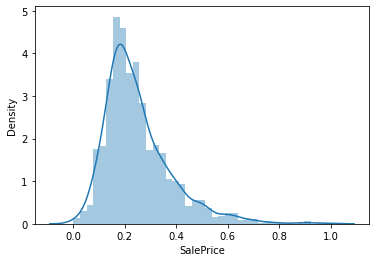

In [77]:
sns.distplot(data1['SalePrice'])

Since the Saleprice figures are skewed towards left, we will apply the log transformation to obtain a centralized data.

In [78]:
#Log Transformation
data1['SalePrice']=np.log1p(data1['SalePrice'])

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

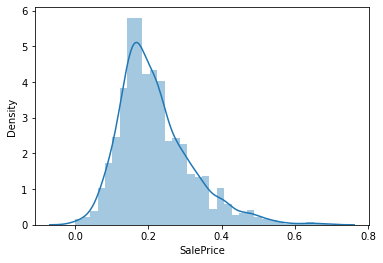

In [79]:
sns.distplot(data1['SalePrice'])

In [80]:
#Adding independent variables to X
X = data1.drop(['SalePrice'], axis=1)
X.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,AgeBuilt,AgeRemodAdd,GarageAgeBlt,AgeSold,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Pave,Alley_none,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtQual_none,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtCond_none,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_none,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType1_none,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_none,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,BsmtHalfBath_1,BsmtHalfBath_2,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenAbvGr_1,KitchenAbvGr_2,KitchenAbvGr_3,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_14,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Fireplaces_1

In [81]:
# Putting response variable to y
y = data1['SalePrice']
y.head()

0    0.263128
1    0.226482
2    0.282921
3    0.167399
4    0.316960
Name: SalePrice, dtype: float64

In [82]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [83]:
X_train.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,AgeBuilt,AgeRemodAdd,GarageAgeBlt,AgeSold,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Pave,Alley_none,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtQual_none,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtCond_none,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_none,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType1_none,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_none,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,BsmtHalfBath_1,BsmtHalfBath_2,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenAbvGr_1,KitchenAbvGr_2,KitchenAbvGr_3,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_14,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Fireplaces_1

In [84]:
X_test.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,AgeBuilt,AgeRemodAdd,GarageAgeBlt,AgeSold,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Pave,Alley_none,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtQual_none,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtCond_none,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_none,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType1_none,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_none,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,BsmtHalfBath_1,BsmtHalfBath_2,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenAbvGr_1,KitchenAbvGr_2,KitchenAbvGr_3,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_14,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Fireplaces_1

In [85]:
X_train.shape

(1005, 322)

### 4.Model Building and Evaluation

#### Lets first check the model using Linear Regression and RFE

In [86]:
# Building linear Regression model
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [87]:
# predict on train dataset
y_pred_train = lm.predict(X_train)

# predict on test dataset
y_pred_test = lm.predict(X_test)

In [88]:
metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.960148651592571
-1.0344062063203955e+18
0.4114088054721864
3.8056090490614267e+18
0.0004093619954947128
8809280206160710.0


Since the Test R2 is too low, we will use RFE to select highly predictive variables.

In [89]:
#residual for train data
residual_train = y_train - y_pred_train

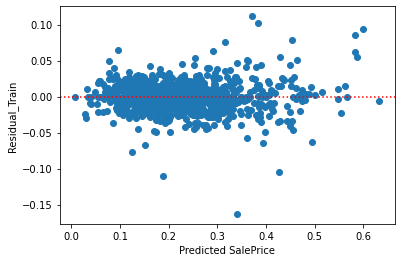

In [90]:
# Scatter plot of the predicted values on the x-axis and the residuals on the y-axis
plt.scatter( y_pred_train , residual_train)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predicted SalePrice")
plt.ylabel("Residual_Train")
plt.show()

In [91]:
#residual for test data
residual_test = y_test - y_pred_test

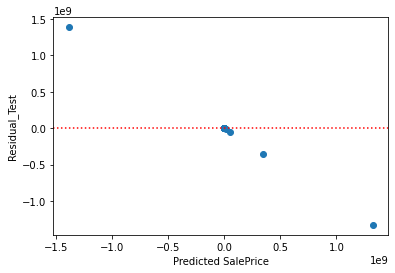

In [92]:
# Scatter plot of the predicted values on the x-axis and the residuals on the y-axis
plt.scatter( y_pred_test , residual_test)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predicted SalePrice")
plt.ylabel("Residual_Test")
plt.show()

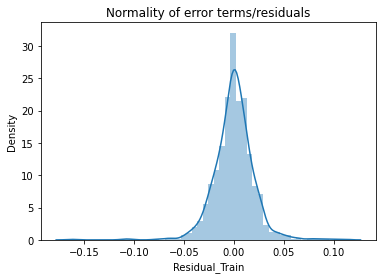

In [93]:
# Distribution of errors
p = sns.distplot(residual_train,kde=True)
p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residual_Train")
plt.show()

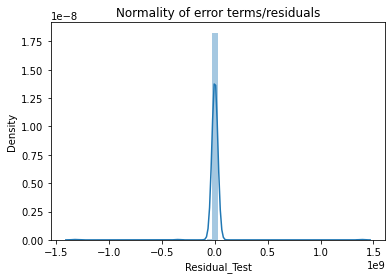

In [94]:
# Distribution of errors
p = sns.distplot(residual_test,kde=True)
p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residual_Test")
plt.show()

In [95]:
X_train.shape

(1005, 322)

There are 322 variables for analysis.

In [96]:
# running RFE for top 120 variables
rfe = RFE(lm, 120)            
rfe = rfe.fit(X_train, y_train)

In [97]:
# Select the top 120 variables
col = X_train.columns[rfe.support_]
col

Index(['LotArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'OpenPorchSF', 'EnclosedPorch',
       ...
       'PoolQC_Gd', 'PoolQC_none', 'MiscFeature_Shed', 'MiscFeature_none',
       'SaleType_Con', 'SaleType_New', 'SaleType_Oth', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Partial'],
      dtype='object', length=120)

In [98]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [99]:
X_train_rfe.head()

,LotArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,AgeBuilt,MSSubClass_90,MSSubClass_160,MSSubClass_180,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Utilities_NoSeWa,Neighborhood_Crawfor,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_StoneBr,Condition1_RRAe,Condition2_PosA,Condition2_PosN,BldgType_Duplex,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Shed,RoofMatl_Membran,Exterior1st_BrkComm,Exterior1st_CBlock,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Stone,Exterior2nd_Brk Cmn,Exterior2nd_CBlock,Exterior2nd_MetalSd,Exterior2nd_Other,Foundation_Stone,Foundation_Wood,BsmtQual_none,BsmtCond_Po,BsmtCond_none,BsmtExposure_Gd,BsmtFinType1_none,BsmtFinType2_none,Heating_GasA,Heating_GasW,Heating_Wall,HeatingQC_Po,Electrical_Mix,BedroomAbvGr_8,KitchenAbvGr_1,KitchenAbvGr_3,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_14,Functional_Sev,Functional_Typ,Fireplaces_1,Fireplaces_2,Fireplaces_3,FireplaceQu_none,GarageType_none,GarageFinish_none,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_none,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,GarageCond_none,PoolQC_Gd,PoolQC_none,MiscFeature_Shed,MiscFeature_none,SaleType_Con,SaleType_New,SaleType_Oth,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Partial
1446,0.357640,0.271024,0.0,0.254709,0.295093,0.000000,0.0,0.260843,0.071298,0.0,0.0,0.000,0.0,0.347826,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0
391,0.157052,0.315356,0.0,0.048801,0.162405,0.636414,0.0,0.496946,0.351005,0.0,0.0,0.000,0.0,0.065217,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0
763,0.117044,0.531536,0.0,0.038099,0.322737,0.603410,0.0,0.620342,0.234004,0.0,0.0,0.375,0.0,0.079710,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0
989,0.098257,0.000000,0.0,0.329623,0.153421,0.438944,0.0,0.379352,0.091408,0.0,0.0,0.000,0.0,0.028986,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1
597,0.037748,0.000000,0.0,0.538527,0.369039,0.000000,0.0,0.326206,0.029250,0.0,0.0,0.000,0.0,0.028986,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1


In [100]:
X_train_rfe.shape

(1005, 120)

In [101]:
X_test_rfe = X_test[col]

In [102]:
X_test_rfe.head()

,LotArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,AgeBuilt,MSSubClass_90,MSSubClass_160,MSSubClass_180,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Utilities_NoSeWa,Neighborhood_Crawfor,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_StoneBr,Condition1_RRAe,Condition2_PosA,Condition2_PosN,BldgType_Duplex,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Shed,RoofMatl_Membran,Exterior1st_BrkComm,Exterior1st_CBlock,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Stone,Exterior2nd_Brk Cmn,Exterior2nd_CBlock,Exterior2nd_MetalSd,Exterior2nd_Other,Foundation_Stone,Foundation_Wood,BsmtQual_none,BsmtCond_Po,BsmtCond_none,BsmtExposure_Gd,BsmtFinType1_none,BsmtFinType2_none,Heating_GasA,Heating_GasW,Heating_Wall,HeatingQC_Po,Electrical_Mix,BedroomAbvGr_8,KitchenAbvGr_1,KitchenAbvGr_3,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_14,Functional_Sev,Functional_Typ,Fireplaces_1,Fireplaces_2,Fireplaces_3,FireplaceQu_none,GarageType_none,GarageFinish_none,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_none,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,GarageCond_none,PoolQC_Gd,PoolQC_none,MiscFeature_Shed,MiscFeature_none,SaleType_Con,SaleType_New,SaleType_Oth,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Partial
57,0.148932,0.000000,0.000000,0.368151,0.181755,0.473047,0.0,0.423335,0.127971,0.000000,0.0,0.0,0.0,0.043478,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0
1286,0.122227,0.260055,0.071872,0.290240,0.343469,0.000000,0.0,0.303604,0.047532,0.000000,0.0,0.0,0.0,0.340580,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0
367,0.113013,0.169561,0.000000,0.311644,0.379060,0.000000,0.0,0.335064,0.201097,0.000000,0.0,0.0,0.0,0.347826,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0
1022,0.117174,0.148080,0.000000,0.251712,0.199724,0.184818,0.0,0.279169,0.000000,0.347826,0.0,0.0,0.0,0.579710,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0
1300,0.136220,0.317185,0.000000,0.121575,0.231859,0.537954,0.0,0.503665,0.000000,0.000000,0.0,0.0,0.0,0.079710,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0


In [103]:
# Building linear Regression model after RFE
lm1 = LinearRegression()
lm1.fit(X_train_rfe, y_train)

LinearRegression()

In [104]:
# predict on train dataset
y_pred_train_rfe = lm1.predict(X_train_rfe)

# predict on test dataset
y_pred_test_rfe = lm1.predict(X_test_rfe)

In [105]:
metric_rfe = []
r2_train_lr_rfe = r2_score(y_train, y_pred_train_rfe)
print(r2_train_lr_rfe)
metric_rfe.append(r2_train_lr_rfe)

r2_test_lr_rfe = r2_score(y_test, y_pred_test_rfe)
print(r2_test_lr_rfe)
metric_rfe.append(r2_test_lr_rfe)

rss1_lr_rfe = np.sum(np.square(y_train - y_pred_train_rfe))
print(rss1_lr_rfe)
metric_rfe.append(rss1_lr_rfe)

rss2_lr_rfe = np.sum(np.square(y_test - y_pred_test_rfe))
print(rss2_lr_rfe)
metric_rfe.append(rss2_lr_rfe)

mse_train_lr_rfe = mean_squared_error(y_train, y_pred_train_rfe)
print(mse_train_lr_rfe)
metric_rfe.append(mse_train_lr_rfe**0.5)

mse_test_lr_rfe = mean_squared_error(y_test, y_pred_test_rfe)
print(mse_test_lr_rfe)
metric_rfe.append(mse_test_lr_rfe**0.5)

0.9445735267713566
-2.8292843430122303e+19
0.5721999393697157
1.0409015367798514e+20
0.0005693531735022047
2.409494298101508e+17


Even after using RFE, there is no improvement in Test R2 score infact it got further reduced.

#### Ridge Regression

In [106]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [107]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=5]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.041803,0.012401,0.009000,0.002281,0.0001,{'alpha': 0.0001},-0.024135,-0.023382,-0.024026,-0.023452,-0.020497,-0.023099,0.001335,24,-0.013778,-0.013252,-0.012995,-0.013084,-0.013604,-0.013342,0.000301
1,0.035202,0.001833,0.010001,0.000632,0.001,{'alpha': 0.001},-0.024112,-0.023323,-0.024002,-0.023409,-0.020464,-0.023062,0.001336,23,-0.013778,-0.013255,-0.012997,-0.013090,-0.013612,-0.013346,0.000301
2,0.028802,0.004308,0.007800,0.001833,0.01,{'alpha': 0.01},-0.023907,-0.022881,-0.023806,-0.023097,-0.020202,-0.022779,0.001347,22,-0.013785,-0.013294,-0.013016,-0.013137,-0.013676,-0.013382,0.000300
3,0.030802,0.002040,0.007400,0.001855,0.05,{'alpha': 0.05},-0.023287,-0.022000,-0.023314,-0.022423,-0.019672,-0.022139,0.001333,20,-0.013840,-0.013436,-0.013100,-0.013277,-0.013832,-0.013497,0.000296
4,0.031002,0.005254,0.007800,0.001721,0.1,{'alpha': 0.1},-0.022812,-0.021528,-0.022969,-0.021947,-0.019408,-0.021733,0.001280,19,-0.013901,-0.013546,-0.013176,-0.013395,-0.013950,-0.013594,0.000296


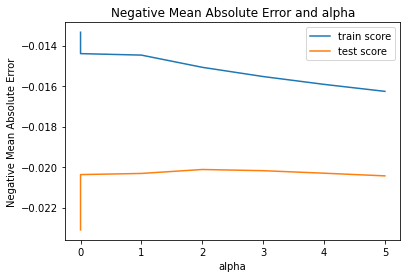

In [108]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [109]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 2.0}


In [110]:
#Fitting Ridge model for alpha = 2 and printing coefficients which have been penalised
alpha = 2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 1.23503210e-02  5.13082558e-02  1.90980905e-02  7.31828596e-02
  2.25339723e-02  3.89488790e-02  8.06809274e-02  3.83403366e-02
 -1.27540777e-02  9.03781317e-02  2.11535412e-02  1.53249462e-02
  1.97823592e-02  1.61117442e-02  1.89813309e-02  3.15019907e-02
  7.39859505e-03  3.59555300e-03 -3.47215729e-02 -1.06689226e-02
 -9.77238980e-03  1.89214461e-03 -7.46289028e-03  9.92900608e-03
 -4.27868910e-03 -6.51746140e-03  7.11049875e-04  3.79878492e-03
  1.66515434e-03 -1.17862473e-03 -5.98404177e-03 -6.89078755e-03
 -6.82830774e-03 -1.37384927e-02 -6.53053543e-03 -7.01569708e-03
  2.77653871e-02  8.96416742e-03  1.26815013e-02  9.70313927e-03
  4.49648941e-03  6.72701827e-04  2.31221921e-03  6.18145005e-03
  3.95595325e-03  1.70005685e-04  8.49588733e-03 -1.10278727e-02
  1.57527001e-03 -1.06551307e-02  1.10172495e-02 -8.35166295e-03
 -6.73021245e-04 -1.58893139e-03  5.85524270e-03 -1.12891986e-02
  3.39709200e-04  2.40356371e-03  4.16189068e-03  3.79122266e-03
 -2.86450758e-03  2.95613

In [111]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R2 Score (Train) -->',r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R2 Score (Test)  -->',r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS (Train)      -->',rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS (Test)       -->',rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('MSE (Train)      -->',mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE (Test)       -->',mse_test_lr)
metric2.append(mse_test_lr**0.5)

R2 Score (Train) --> 0.9535576912085453
R2 Score (Test)  --> 0.916283384936825
RSS (Train)      --> 0.4794511490030525
RSS (Test)       --> 0.3079957427696738
MSE (Train)      --> 0.00047706581990353486
MSE (Test)       --> 0.0007129531082631338


In [112]:
#residual for train data
residual_train = y_train - y_pred_train

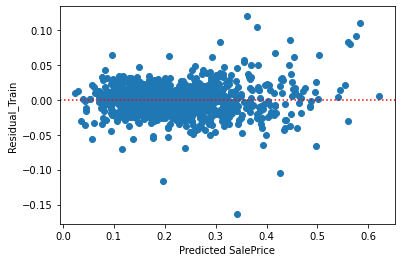

In [113]:
# Scatter plot of the predicted values on the x-axis and the residuals on the y-axis
plt.scatter( y_pred_train , residual_train)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predicted SalePrice")
plt.ylabel("Residual_Train")
plt.show()

In [114]:
#residual for test data
residual_test = y_test - y_pred_test

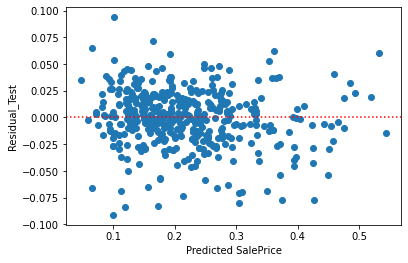

In [115]:
# Scatter plot of the predicted values on the x-axis and the residuals on the y-axis
plt.scatter( y_pred_test , residual_test)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predicted SalePrice")
plt.ylabel("Residual_Test")
plt.show()

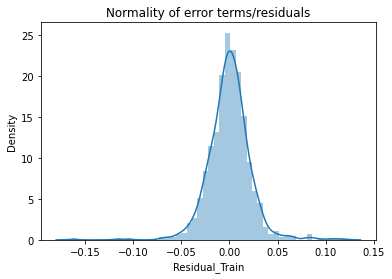

In [116]:
# Distribution of errors
p = sns.distplot(residual_train,kde=True)
p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residual_Train")
plt.show()

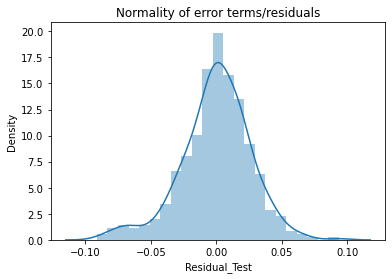

In [117]:
# Distribution of errors
p = sns.distplot(residual_test,kde=True)
p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residual_Test")
plt.show()

In [118]:
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 0.101),
 ('LotFrontage', 0.012),
 ('LotArea', 0.051),
 ('MasVnrArea', 0.019),
 ('BsmtFinSF1', 0.073),
 ('BsmtFinSF2', 0.023),
 ('BsmtUnfSF', 0.039),
 ('1stFlrSF', 0.081),
 ('2ndFlrSF', 0.038),
 ('LowQualFinSF', -0.013),
 ('GrLivArea', 0.09),
 ('GarageArea', 0.021),
 ('WoodDeckSF', 0.015),
 ('OpenPorchSF', 0.02),
 ('EnclosedPorch', 0.016),
 ('3SsnPorch', 0.019),
 ('ScreenPorch', 0.032),
 ('PoolArea', 0.007),
 ('MiscVal', 0.004),
 ('AgeBuilt', -0.035),
 ('AgeRemodAdd', -0.011),
 ('GarageAgeBlt', -0.01),
 ('AgeSold', 0.002),
 ('MSSubClass_30', -0.007),
 ('MSSubClass_40', 0.01),
 ('MSSubClass_45', -0.004),
 ('MSSubClass_50', -0.007),
 ('MSSubClass_60', 0.001),
 ('MSSubClass_70', 0.004),
 ('MSSubClass_75', 0.002),
 ('MSSubClass_80', -0.001),
 ('MSSubClass_85', -0.006),
 ('MSSubClass_90', -0.007),
 ('MSSubClass_120', -0.007),
 ('MSSubClass_160', -0.014),
 ('MSSubClass_180', -0.007),
 ('MSSubClass_190', -0.007),
 ('MSZoning_FV', 0.028),
 ('MSZoning_RH', 0.009),
 ('MSZoning_RL', 

In [119]:
# Create a dataframe for Ridge Coefficients
mod_ridge = list(zip(cols, model_parameters))

In [120]:
pararidge = pd.DataFrame(mod_ridge)
pararidge.columns = ['Variable', 'Coeff']

# Sorting the coefficients in ascending order
pararidge = pararidge.sort_values((['Coeff']), axis = 0, ascending = False)
pararidge.head(20)

,Variable,Coeff
0,constant,0.101
10,GrLivArea,0.090
7,1stFlrSF,0.081
4,BsmtFinSF1,0.073
2,LotArea,0.051
113,OverallQual_9,0.040
6,BsmtUnfSF,0.039
8,2ndFlrSF,0.038
114,OverallQual_10,0.036
78,Neighborhood_StoneBr,0.035


In [121]:
pararidge.shape

(323, 2)

In [122]:
# since there were few coefficients at 0, we removed them from features
predridge = pd.DataFrame(pararidge[(pararidge['Coeff'] != 0)])
predridge.head(20)

,Variable,Coeff
0,constant,0.101
10,GrLivArea,0.090
7,1stFlrSF,0.081
4,BsmtFinSF1,0.073
2,LotArea,0.051
113,OverallQual_9,0.040
6,BsmtUnfSF,0.039
8,2ndFlrSF,0.038
114,OverallQual_10,0.036
78,Neighborhood_StoneBr,0.035


In [123]:
predridge.shape

(302, 2)

#### Lasso Regression

In [124]:
#X_train1=X_train.drop(['GrLivArea', 'BsmtFinSF1', 'OverallQual_10', 'LotArea', 'OverallQual_9'], axis=1)

In [125]:
#X_test1=X_test.drop(['GrLivArea', 'BsmtFinSF1', 'OverallQual_10', 'LotArea', 'OverallQual_9'], axis=1)

In [126]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [127]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=5]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.101406,0.030344,0.010400,0.003007,0.0001,{'alpha': 0.0001},-0.019503,-0.019783,-0.021842,-0.019147,-0.017405,-0.019536,0.001419,1,-0.016201,-0.015932,-0.015613,-0.016191,-0.016645,-0.016116,0.000340
1,0.033202,0.002400,0.008801,0.001600,0.001,{'alpha': 0.001},-0.024183,-0.027320,-0.030294,-0.024448,-0.024085,-0.026066,0.002430,2,-0.024895,-0.024447,-0.023449,-0.024761,-0.024510,-0.024413,0.000509
2,0.023001,0.003099,0.007600,0.001744,0.01,{'alpha': 0.01},-0.044414,-0.050143,-0.055443,-0.046394,-0.044906,-0.048260,0.004115,3,-0.047530,-0.047270,-0.047387,-0.047464,-0.048458,-0.047622,0.000427
3,0.025201,0.004355,0.009400,0.001200,0.05,{'alpha': 0.05},-0.073273,-0.076275,-0.087374,-0.072139,-0.077253,-0.077263,0.005392,4,-0.078565,-0.077658,-0.074354,-0.078533,-0.077151,-0.077252,0.001545
4,0.020601,0.001855,0.007401,0.001356,0.1,{'alpha': 0.1},-0.073273,-0.076275,-0.087374,-0.072139,-0.077253,-0.077263,0.005392,4,-0.078565,-0.077658,-0.074354,-0.078533,-0.077151,-0.077252,0.001545


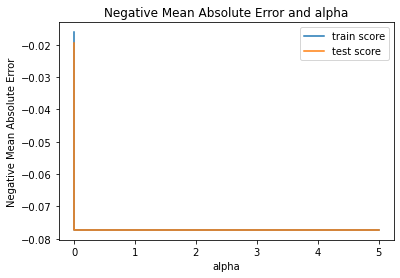

In [128]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [129]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [130]:
#Fitting Ridge model for alpha = 0.0001 and printing coefficients which have been penalised

alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)

Lasso(alpha=0.0001)

In [131]:
lasso.coef_

array([ 2.12765321e-03,  6.69789785e-02,  1.28857625e-02,  7.40702775e-02,
        1.80120494e-02,  3.69189435e-02,  2.59138113e-02,  0.00000000e+00,
       -0.00000000e+00,  2.14896233e-01,  2.10547488e-02,  1.27227741e-02,
        1.58763926e-02,  6.02328410e-03,  0.00000000e+00,  2.87905211e-02,
        0.00000000e+00,  0.00000000e+00, -5.09803370e-02, -1.23199464e-02,
       -9.47936709e-03,  0.00000000e+00, -1.43412915e-03,  0.00000000e+00,
        0.00000000e+00, -2.51782998e-03,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -2.31680147e-03,
       -0.00000000e+00, -7.23802697e-03, -0.00000000e+00, -2.16217437e-03,
        1.88450478e-02,  0.00000000e+00,  4.51795155e-03, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  2.95911888e-03,
        0.00000000e+00, -0.00000000e+00,  6.10293299e-03, -3.25595994e-03,
        3.00134786e-04, -0.00000000e+00,  7.91536774e-03, -1.68389153e-03,
        0.00000000e+00, -

In [132]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R2 Score (Train) -->',r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R2 Score (Test)  -->',r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS (Train)      -->',rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS (Test)       -->',rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('MSE (Train)      -->',mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE (Test)       -->',mse_test_lr)
metric3.append(mse_test_lr**0.5)

R2 Score (Train) --> 0.9463610016510096
R2 Score (Test)  --> 0.9228034224070627
RSS (Train)      --> 0.5537467894905397
RSS (Test)       --> 0.28400834454512125
MSE (Train)      --> 0.0005509918303388454
MSE (Test)       --> 0.0006574267234840769


In [133]:
#residual for train data
residual_train = y_train - y_pred_train

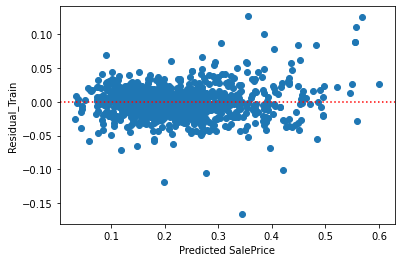

In [134]:
# Scatter plot of the predicted values on the x-axis and the residuals on the y-axis
plt.scatter( y_pred_train , residual_train)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predicted SalePrice")
plt.ylabel("Residual_Train")
plt.show()

In [135]:
#residual for test data
residual_test = y_test - y_pred_test

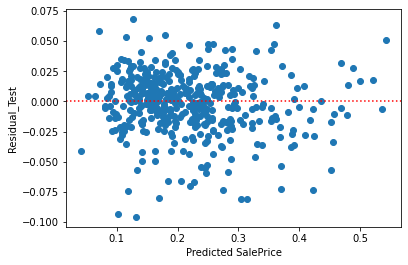

In [136]:
# Scatter plot of the predicted values on the x-axis and the residuals on the y-axis
plt.scatter( y_pred_test , residual_test)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predicted SalePrice")
plt.ylabel("Residual_Test")
plt.show()

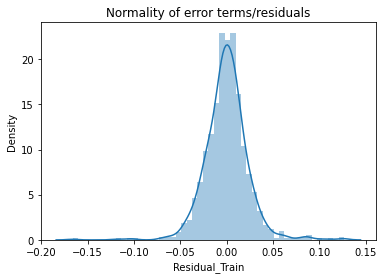

In [137]:
# Distribution of errors
p = sns.distplot(residual_train,kde=True)
p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residual_Train")
plt.show()

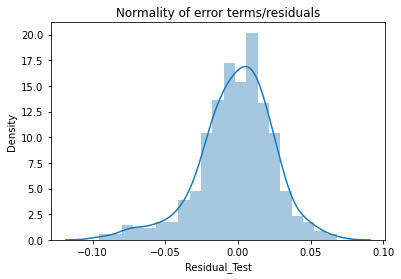

In [138]:
# Distribution of errors
p = sns.distplot(residual_test,kde=True)
p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residual_Test")
plt.show()

In [139]:
# lasso model parameters
model_parameters = list(lasso.coef_ )
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 0.042),
 ('LotFrontage', 0.002),
 ('LotArea', 0.067),
 ('MasVnrArea', 0.013),
 ('BsmtFinSF1', 0.074),
 ('BsmtFinSF2', 0.018),
 ('BsmtUnfSF', 0.037),
 ('1stFlrSF', 0.026),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', -0.0),
 ('GrLivArea', 0.215),
 ('GarageArea', 0.021),
 ('WoodDeckSF', 0.013),
 ('OpenPorchSF', 0.016),
 ('EnclosedPorch', 0.006),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.029),
 ('PoolArea', 0.0),
 ('MiscVal', 0.0),
 ('AgeBuilt', -0.051),
 ('AgeRemodAdd', -0.012),
 ('GarageAgeBlt', -0.009),
 ('AgeSold', 0.0),
 ('MSSubClass_30', -0.001),
 ('MSSubClass_40', 0.0),
 ('MSSubClass_45', 0.0),
 ('MSSubClass_50', -0.003),
 ('MSSubClass_60', 0.0),
 ('MSSubClass_70', 0.0),
 ('MSSubClass_75', -0.0),
 ('MSSubClass_80', 0.0),
 ('MSSubClass_85', -0.0),
 ('MSSubClass_90', -0.002),
 ('MSSubClass_120', -0.0),
 ('MSSubClass_160', -0.007),
 ('MSSubClass_180', -0.0),
 ('MSSubClass_190', -0.002),
 ('MSZoning_FV', 0.019),
 ('MSZoning_RH', 0.0),
 ('MSZoning_RL', 0.005),
 ('MSZoning_RM', -0.0

In [140]:
# Creating a dataframe for the coefficients obtained from Lasso
modlasso = list(zip(cols, model_parameters))

In [141]:
paralasso = pd.DataFrame(modlasso)
paralasso.columns = ['Variable', 'Coeff']
paralasso.head()

,Variable,Coeff
0,constant,0.042
1,LotFrontage,0.002
2,LotArea,0.067
3,MasVnrArea,0.013
4,BsmtFinSF1,0.074


In [142]:
# sort the coefficients in ascending order
paralasso = paralasso.sort_values((['Coeff']), axis = 0, ascending = False)
paralasso.head(20)

,Variable,Coeff
10,GrLivArea,0.215
4,BsmtFinSF1,0.074
114,OverallQual_10,0.067
2,LotArea,0.067
113,OverallQual_9,0.065
0,constant,0.042
6,BsmtUnfSF,0.037
62,Neighborhood_Crawfor,0.034
78,Neighborhood_StoneBr,0.033
315,SaleType_New,0.032


In [143]:
paralasso.shape

(323, 2)

In [144]:
# since there were few coefficients at 0, we removed them from features
predlasso = pd.DataFrame(paralasso[(paralasso['Coeff'] != 0)])
predlasso.head(20)

,Variable,Coeff
10,GrLivArea,0.215
4,BsmtFinSF1,0.074
114,OverallQual_10,0.067
2,LotArea,0.067
113,OverallQual_9,0.065
0,constant,0.042
6,BsmtUnfSF,0.037
62,Neighborhood_Crawfor,0.034
78,Neighborhood_StoneBr,0.033
315,SaleType_New,0.032


In [145]:
predlasso.shape

(126, 2)

In [146]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.601487e-01,0.953558,0.946361
1,R2 Score (Test),-1.034406e+18,0.916283,0.922803
2,RSS (Train),4.114088e-01,0.479451,0.553747
3,RSS (Test),3.805609e+18,0.307996,0.284008
4,MSE (Train),2.023270e-02,0.021842,0.023473
5,MSE (Test),9.385777e+07,0.026701,0.025640


### 5. Observation

The model performance by Lasso Regression is better than Ridge Regression in terms of R2 values of Train and Test.
<br>Also, it is better to use Lasso, since it assigns a zero value to insignificant features, enabling us to choose only
important predictive variables.
<br>It is always advisable to use simple but robust model.
<br>Simpler equation can be formulated using the features and coefficients obtained by Lasso.